In [ ]:
from base64 import b64encode
from io import BytesIO
from PIL import Image
import requests


In [ ]:
def url_to_b64(img_url):
    return str(b64encode(requests.get(img_url).content))[2:-1]

def to_b64(img_path, format='JPEG'):
    image = Image.open(img_path)
    image_bytes = BytesIO()
    image.save(image_bytes, format=format)
    return str(b64encode(image_bytes.getvalue()))[2:-1]

In [ ]:
api_key = ""
url = "https://api.segmind.com/v1/faceswap-v2"

source_image_path = 'musk.jpg'
target_image_path = 'bezos.jpg'

# Request payload
data = {
  #"source_img": toB64('https://www.segmind.com/elon.jpg'),
  #"target_img": toB64('https://segmind-sd-models.s3.amazonaws.com/display_images/faceswapv2_target.jpg'),
  "source_img": to_b64(source_image_path),
  "target_img": to_b64(target_image_path),
  "face_restore": "codeformer-v0.1.0.pth",
  "base64": False
}

response = requests.post(url, json=data, headers={'x-api-key': api_key})
print(response)
if response.status_code != 200:
    print(response.content)

In [24]:
image_content = response.content
# Create a PIL image from the response content
pil_image = Image.open(BytesIO(image_content))

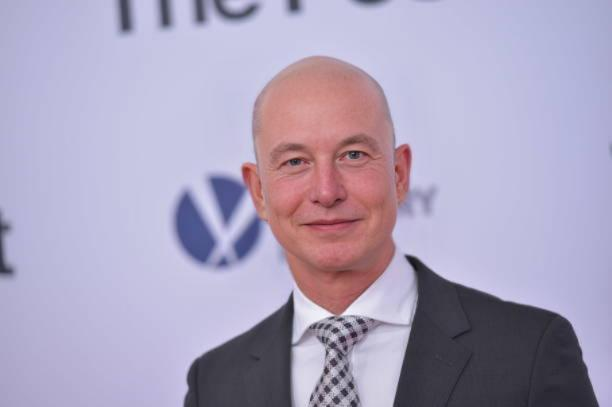

In [25]:
pil_image